<a href="https://colab.research.google.com/github/lucianoribeirogyn/colby_abacus/blob/main/abaco3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Esse script serve para
#1) Ler os pontos do abaco 03 gerados a partir do aplicativo Web Plot Digitizer 4.6,
#2) Encontrar as equaçṍes das curvas 
#3) Redesenhar o gráfico com as equações encontradas 

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [19]:
#05 Curvas do ábaco 03
curves = ['050','075','100','125','150']

arquivo_dados = []
for x in curves:
  arquivo_dados.append(pd.read_csv(x+'.csv', sep = ';'))

razao_eficiencia = []
fator_correcao = []
curve = []
cont = 0
for x in curves:
  #axis x
  razao_eficiencia_aux = pd.Series(arquivo_dados[cont].iloc[:,0]).tolist()
  razao_eficiencia.append(razao_eficiencia_aux)   
  #axis y
  fator_correcao_aux = pd.Series(arquivo_dados[cont].iloc[:,1]).tolist()
  fator_correcao.append(fator_correcao_aux)
  curve.append(np.polyfit(np.log10(razao_eficiencia_aux), np.log10(fator_correcao_aux), 1))
  cont += 1


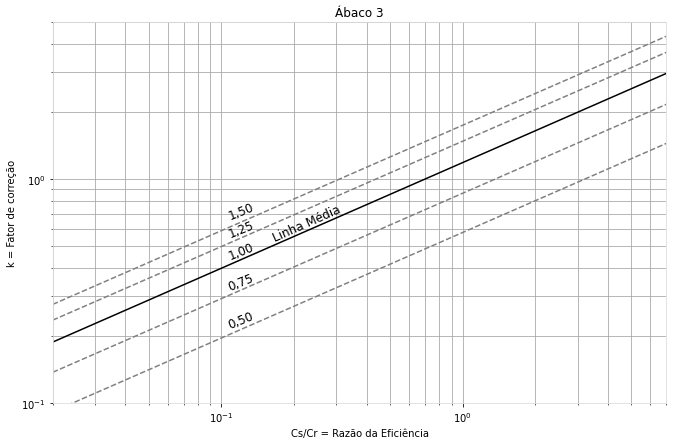

In [20]:
#esse script serve para desenhar o abaco 03 baseado nos pontos que foram gerados a partir da equaçao acima
razao_eficiencia_new = []
fator_correcao_new = []
cont = 0
for x in curves:
  razao_eficiencia_aux = []
  fator_correcao_aux = []
  for x in np.arange(0.02, 7, 0.01):
      razao_eficiencia_aux.append(x)
      aux = curve[cont][0]*math.log10(x)+curve[cont][1]
      fator_correcao_aux.append(pow(10, aux))
  razao_eficiencia_new.append(razao_eficiencia_aux)
  fator_correcao_new.append(fator_correcao_aux)
  cont += 1

# Display grid
plt.figure(figsize=[11, 7])

ax = plt.axes()
ax.set_facecolor("white")

ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd') 
ax.spines['right'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

# Linear X axis, Logarithmic Y axis
cont = 0;
for x in curves:
  if (x=='100'):
    plt.semilogy(razao_eficiencia_new[cont], fator_correcao_new[cont], color='k')
  else:
    plt.semilogy(razao_eficiencia_new[cont], fator_correcao_new[cont], color='grey', linestyle='--')
  cont += 1

plt.text(0.105, 0.66, '1,50', fontsize=12, rotation=22)
plt.text(0.105, 0.55, '1,25', fontsize=12, rotation=22)
plt.text(0.105, 0.44, '1,00', fontsize=12, rotation=22)
plt.text(0.16, 0.53, 'Linha Média', fontsize=12, rotation=24)
plt.text(0.105, 0.32, '0,75', fontsize=12, rotation=22)
plt.text(0.105, 0.215, '0,50', fontsize=12, rotation=22)

plt.ylim([0.1,5])
plt.xlim([0.02,7])

# Provide the title for the semilog plt
plt.title('Ábaco 3')
# Give x axis label for the semilog plt
plt.xlabel('Cs/Cr = Razão da Eficiência')
# Give y axis label for the semilog plt
plt.ylabel("k = Fator de correção")
# Display the semilog plt

plt.loglog()

plt.grid(True, which="both", ls="-", color='0.65', axis='both')

#plt.savefig('abaco3.png')
#plt.savefig('abaco3.eps', format='eps')
plt.show()